# Data period features

This notebook presents operational and environmental features for each water quality sensing period.

In [78]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors
import plotly.io as pio
default_colors = plotly.colors.qualitative.Plotly
from bayesian_wq_calibration.epanet import model_simulation
from bayesian_wq_calibration.plotting import plot_network
from bayesian_wq_calibration.constants import TIMESERIES_DIR
from bayesian_wq_calibration.data import get_sensor_stats, count_pressure_events, count_turbidity_events

In [80]:
wong_colors = [
    "rgb(0, 114, 178)",      # wong-blue
    "rgb(230, 159, 0)",      # wong-orange
    "rgb(0, 158, 115)",      # wong-green
    "rgb(128, 128, 128)",    # wong-black/grey
    "rgb(86, 180, 233)",     # wong-skyblue
    "rgb(240, 228, 66)",     # wong-yellow
    "rgb(213, 94, 0)",       # wong-vermillion
    "rgb(204, 121, 167)"     # wong-purple
]

Load sensing data for selected sensing period.

In [95]:
data_period = 18 # 20 calibration events (as at 30 October 2024)
try:
    flow_df = pd.read_csv(TIMESERIES_DIR / f"processed/{str(data_period).zfill(2)}-flow.csv")
    pressure_df = pd.read_csv(TIMESERIES_DIR / f"processed/{str(data_period).zfill(2)}-pressure.csv")
    wq_df = pd.read_csv(TIMESERIES_DIR / f"processed/{str(data_period).zfill(2)}-wq.csv", low_memory=False)

    print(f"Data period: {data_period}")
    print(f"Start datetime: {flow_df['datetime'].unique()[0]}")
    print(f"End datetime: {flow_df['datetime'].unique()[-1]}")
except:
    print(f"Data period {data_period} does not exist.")

Data period: 18
Start datetime: 2024-08-20 00:00:00
End datetime: 2024-08-26 23:45:00


### Sensor map

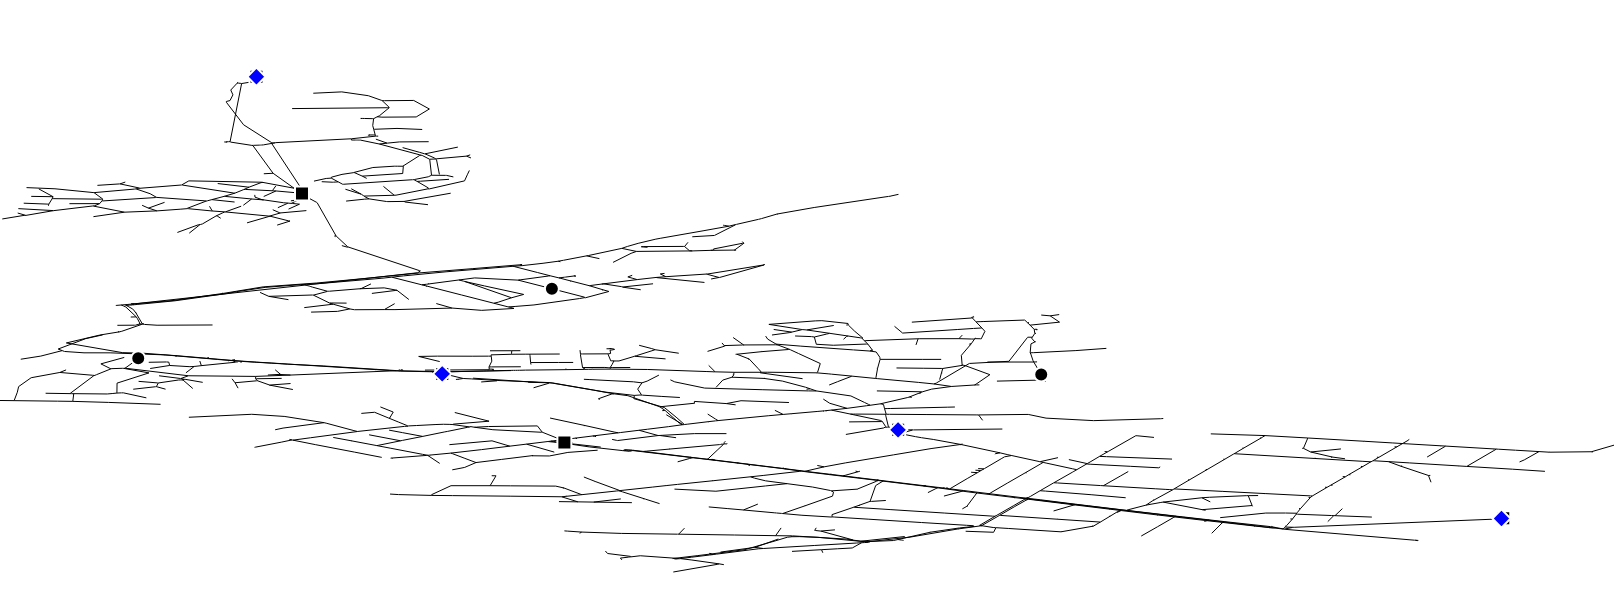

In [46]:
plot_network(wq_sensors=True, flow_meters=True, show_legend=True)

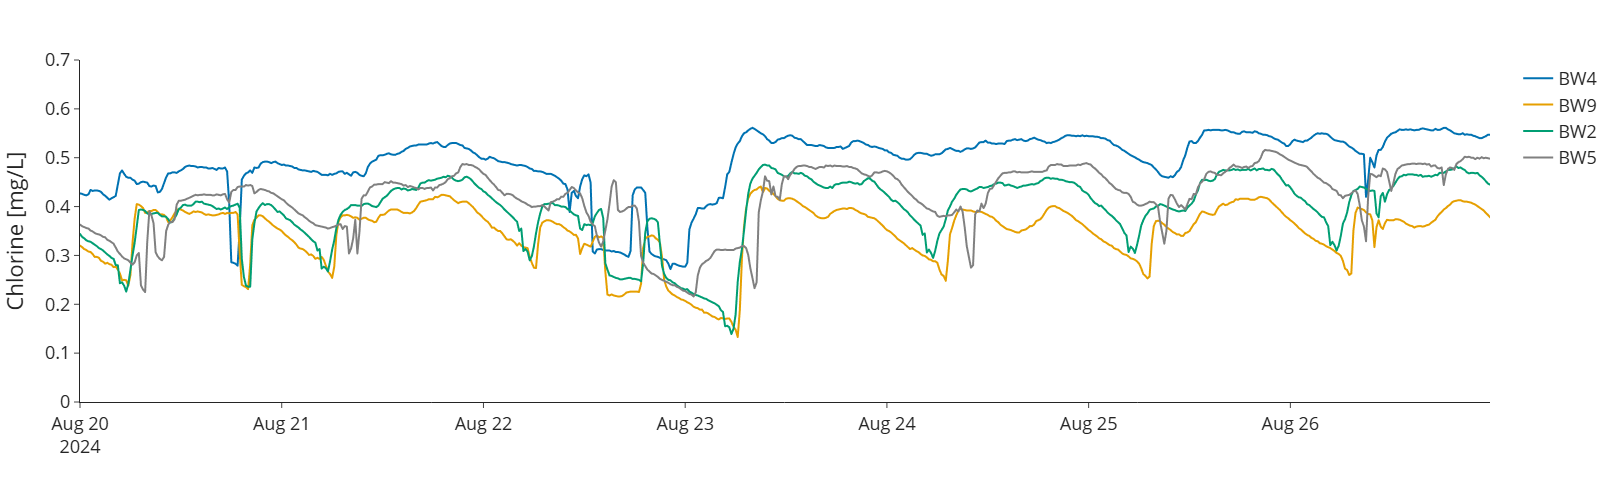

In [97]:
### Time series plotting
# Chlorine data from DMA inlet 2005

ordered_ids = ['BW4', 'BW9', 'BW2', 'BW5']

try:
    # wq_bwfl_ids = wq_df['bwfl_id'].unique()
    plot_wq_df = wq_df[(wq_df['data_type'] == 'chlorine') & (~wq_df['bwfl_id'].isin(['BW7', 'BW1', 'BW12', 'BW3', 'BW6']))]
    fig = px.line(
        plot_wq_df,
        x='datetime',
        y='mean',
        color='bwfl_id',
        color_discrete_sequence=wong_colors,
        category_orders={'bwfl_id': ordered_ids}
    )
    fig.update_layout(
        xaxis_title='',
        yaxis_title='Chlorine [mg/L]',
        legend_title_text='',
        template='simple_white',
        height=500,
        width=1000,
        font=dict(size=14),
        legend=dict(font=dict(size=18)),
        xaxis=dict(
            titlefont=dict(size=22),
            tickfont=dict(size=18)
        ),
        
        yaxis=dict(
            titlefont=dict(size=22),
            tickfont=dict(size=18),
            range=[0, 0.7],
            # tickvals=[0, 0.2, 0.4, 0.6, 0.8],
            # ticktext=["0", "0.25", "0.5", "0.75"]
        )
    )
    fig.show()
    fig.write_image("fig6-2b.pdf", 
                engine="kaleido",
                scale=1)
except:
    print("Plotting data not available.")

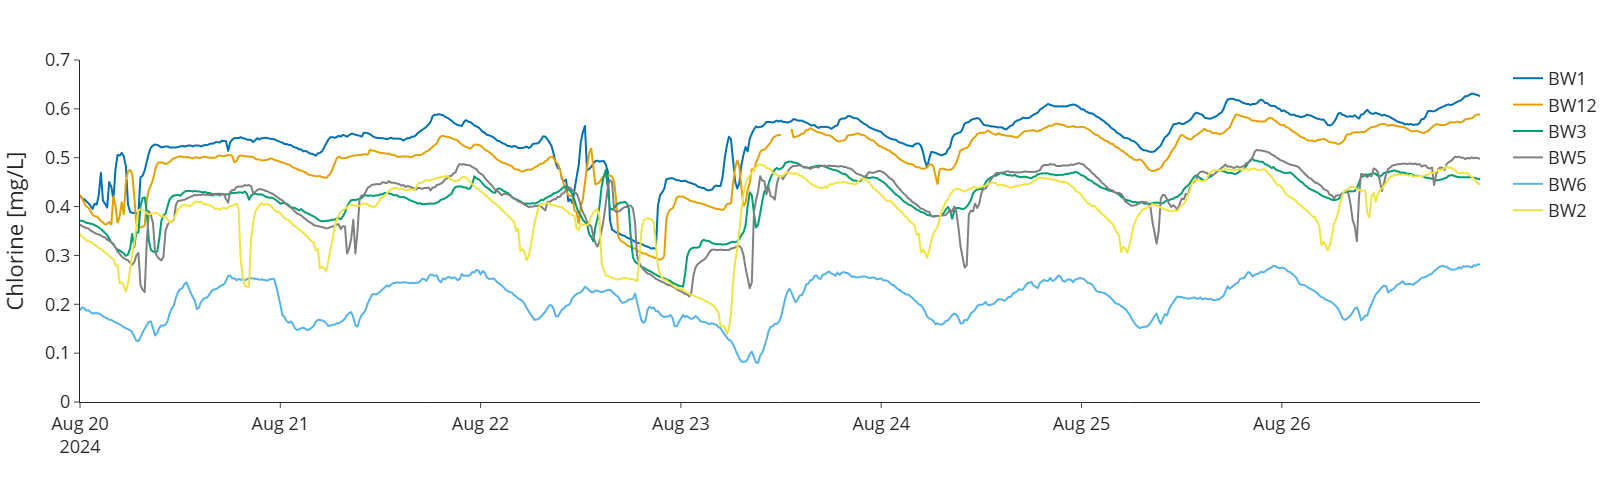

In [98]:
### Time series plotting
# Chlorine data from DMA inlet 2296

ordered_ids = ['BW1', 'BW12', 'BW3', 'BW5', 'BW6', 'BW2']

try:
    # wq_bwfl_ids = wq_df['bwfl_id'].unique()
    plot_wq_df = wq_df[(wq_df['data_type'] == 'chlorine') & (~wq_df['bwfl_id'].isin(['BW7', 'BW4', 'BW9']))]
    fig = px.line(
        plot_wq_df,
        x='datetime',
        y='mean',
        color='bwfl_id',
        color_discrete_sequence=wong_colors,
        category_orders={'bwfl_id': ordered_ids}
    )
    fig.update_layout(
        xaxis_title='',
        yaxis_title='Chlorine [mg/L]',
        legend_title_text='',
        template='simple_white',
        height=500,
        width=1000,
        font=dict(size=14),
        legend=dict(font=dict(size=18)),
        xaxis=dict(
            titlefont=dict(size=22),
            tickfont=dict(size=18)
        ),
        
        yaxis=dict(
            titlefont=dict(size=22),
            tickfont=dict(size=18),
            range=[0, 0.7],
            # tickvals=[0, 0.2, 0.4, 0.6, 0.8],
            # ticktext=["0", "0.25", "0.5", "0.75"]
        )
    )
    fig.show()
    fig.write_image("fig6-2a.pdf", 
                engine="kaleido",
                scale=1)
except:
    print("Plotting data not available.")

Missing data summary.

In [73]:
summary_df = (plot_wq_df.groupby('bwfl_id')['mean'].agg(data_percentage=lambda x: int(x.notna().sum() / len(x) * 100)))
display(summary_df)

,data_percentage
bwfl_id,
BW1,100
BW12,100
BW2,100
BW3,100
BW4,100
BW5,100
BW6,97
BW9,100


Flow data @ DMA inlets and dynamic boundary valves.

In [ ]:
try:
    flow_bwfl_ids = ['inlet_2296', 'inlet_2005', 'Snowden Road DBV', 'New Station Way DBV']
    # flow_bwfl_ids = flow_df['bwfl_id'].unique()
    plot_flow_df = flow_df[flow_df['bwfl_id'].isin(flow_bwfl_ids)]
    fig = px.line(
        plot_flow_df,
        x='datetime',
        y='mean',
        color='bwfl_id',
    )
    fig.update_layout(
        xaxis_title='',
        yaxis_title='Flow [L/s]',
        legend_title_text='',
        template='simple_white',
        height=450,
    )
    fig.show()
except:
    print("Plotting data not available.")

Pressure data @ DMA inlets and control valve locations.

In [ ]:
try:
    pressure_bwfl_ids = ['BWFL 19', 'Stoke Lane PRV (outlet)', 'Snowden Road PRV (inlet)', 'Snowden Road PRV (outlet)', 'New Station Way PRV (inlet)', 'New Station Way PRV (outlet)', 'Lodge Causeway PRV (outlet)', 'Woodland Way PRV (outlet)', 'Woodland Way PRV (inlet)']
    # pressure_bwfl_ids = pressure_df['bwfl_id'].unique()
    plot_pressure_df = pressure_df[pressure_df['bwfl_id'].isin(pressure_bwfl_ids)]
    fig = px.line(
        plot_pressure_df,
        x='datetime',
        y='mean',
        color='bwfl_id',
    )
    fig.update_layout(
        xaxis_title='',
        yaxis_title='Pressure [m]',
        legend_title_text='',
        template='simple_white',
        height=450,
    )
    fig.show()
except:
    print("Plotting data not available.")

### Hydraulic conditions

Flow comparison of data period v. entire dataset (2021-2024).  

In [ ]:
plot_flow_df = plot_flow_df.dropna(subset=['mean'])
flow_period_stats = plot_flow_df.groupby('bwfl_id')['mean'].describe(percentiles=[.01, .10, .25, .50, .75, .90, .99])
flow_dataset_stats = get_sensor_stats('flow', flow_bwfl_ids)

fig = go.Figure()

for i, bwfl_id in enumerate(flow_period_stats.index):
    stats = flow_dataset_stats.loc[bwfl_id]
    
    fig.add_trace(go.Box(
        x=[bwfl_id],
        lowerfence=[stats['min']],
        q1=[stats['25%']],
        median=[stats['50%']],
        q3=[stats['75%']],
        upperfence=[stats['max']],
        name='Entire dataset',
        marker_color=default_colors[1],
        boxpoints=False,
        offsetgroup='flow_dataset_stats',
        showlegend=(i == 0)
    ))

for i, bwfl_id in enumerate(flow_period_stats.index):
    stats = flow_period_stats.loc[bwfl_id]
    
    fig.add_trace(go.Box(
        x=[bwfl_id],
        lowerfence=[stats['min']],
        q1=[stats['25%']],
        median=[stats['50%']],
        q3=[stats['75%']],
        upperfence=[stats['max']],
        name=f'Data period {str(data_period).zfill(2)}',
        marker_color=default_colors[0],
        boxpoints=False,
        offsetgroup='flow_period_stats',
        showlegend=(i == 0)
    ))

fig.update_layout(
    yaxis_title='Flow [L/s]',
    xaxis_title='',
    xaxis=dict(
        tickmode='array',
        tickvals=flow_period_stats.index,
        ticktext=flow_period_stats.index
    ),
    legend_title_text='',
    template='simple_white',
    boxmode='group',
    height=450,
)

fig.show()

Count pressure events, defined as a change in pressure of over $\Delta p=$ {threshold} m during a 15-minute time step.

In [ ]:
p_threshold = 15
pressure_events = count_pressure_events(threshold=p_threshold)

fig = go.Figure()

fig.add_trace(go.Box(
    y=pressure_events,
    x=['num_events'] * len(pressure_events),
    name='Entire dataset',
    marker_color='grey',
    boxpoints=False
))

fig.add_trace(go.Scatter(
    y=[pressure_events[data_period-1]],
    x=['num_events'],
    marker_color=default_colors[1],
    marker=dict(color=default_colors[1], size=12),
    mode="markers",
    name=f'Data period {str(data_period).zfill(2)}',
))

fig.update_layout(
    yaxis_title=f"No. pressure events > {p_threshold} m",
    xaxis_title='Field Lab',
    template='simple_white',
    height=500,
    width=500,
    xaxis=dict(
        showticklabels=False
    ),
    yaxis=dict(
        range=[0, None],
        tickformat=',d',
        nticks=6
    )
)

fig.show()

### Water quality conditions

Temperature comparison between data period and entire dataset (2021-2024).

In [ ]:
temp_df = wq_df[(wq_df['data_type'] == 'temperature')].dropna(subset=['mean'])
temp_period_stats = temp_df.groupby('bwfl_id')['mean'].describe(percentiles=[.01, .10, .25, .50, .75, .90, .99])
temp_dataset_stats = get_sensor_stats('temperature', temp_df['bwfl_id'].unique())

fig = go.Figure()

for i, bwfl_id in enumerate(temp_dataset_stats.index):
    stats = temp_dataset_stats.loc[bwfl_id]

    if stats['count'] != 0:
        fig.add_trace(go.Box(
            x=[bwfl_id],
            lowerfence=[stats['min']],
            q1=[stats['25%']],
            median=[stats['50%']],
            q3=[stats['75%']],
            upperfence=[stats['max']],
            name='Entire dataset',
            marker_color=default_colors[3],
            boxpoints=False,
            offsetgroup='temp_dataset_stats',
            showlegend=(i == 0)
        ))

for i, bwfl_id in enumerate(temp_period_stats.index):
    stats = temp_period_stats.loc[bwfl_id]

    if stats['count'] != 0:
        fig.add_trace(go.Box(
            x=[bwfl_id],
            lowerfence=[stats['min']],
            q1=[stats['25%']],
            median=[stats['50%']],
            q3=[stats['75%']],
            upperfence=[stats['max']],
            name=f'Data period {str(data_period).zfill(2)}',
            marker_color=default_colors[2],
            boxpoints=False,
            offsetgroup='temp_period_stats',
            showlegend=(i == 0)
        ))

fig.update_layout(
    yaxis_title='Temperature [\u00B0C]',
    xaxis_title='',
    xaxis=dict(
        tickmode='array',
        tickvals=sorted(temp_df['bwfl_id'].unique(), key=lambda x: int(x[2:])),
        ticktext=sorted(temp_df['bwfl_id'].unique(), key=lambda x: int(x[2:])),
        categoryorder='array',
        categoryarray=sorted(temp_df['bwfl_id'].unique(), key=lambda x: int(x[2:]))
    ),
    legend_title_text='',
    template='simple_white',
    boxmode='group',
    height=450,
)

fig.show()

pH comparison between data period and entire dataset (2021-2024).

In [ ]:
ph_df = wq_df[(wq_df['data_type'] == 'ph')].dropna(subset=['mean'])
ph_df.loc[(ph_df['mean'] < 4) | (ph_df['mean'] > 11), 'mean'] = np.nan
ph_period_stats = ph_df.groupby('bwfl_id')['mean'].describe(percentiles=[.01, .10, .25, .50, .75, .90, .99])
ph_dataset_stats = get_sensor_stats('ph', ph_df['bwfl_id'].unique())

fig = go.Figure()

for i, bwfl_id in enumerate(ph_period_stats.index):
    stats = ph_period_stats.loc[bwfl_id]

    if stats['count'] != 0:
        fig.add_trace(go.Box(
            x=[bwfl_id],
            lowerfence=[stats['min']],
            q1=[stats['25%']],
            median=[stats['50%']],
            q3=[stats['75%']],
            upperfence=[stats['max']],
            name=f'Data period {str(data_period).zfill(2)}',
            marker_color=default_colors[2],
            boxpoints=False,
            offsetgroup='temp_period_stats',
            showlegend=(i == 0)
        ))

for i, bwfl_id in enumerate(ph_dataset_stats.index):
    stats = ph_dataset_stats.loc[bwfl_id]

    if stats['count'] != 0:
        fig.add_trace(go.Box(
            x=[bwfl_id],
            lowerfence=[stats['min']],
            q1=[stats['25%']],
            median=[stats['50%']],
            q3=[stats['75%']],
            upperfence=[stats['max']],
            name='Entire dataset',
            marker_color=default_colors[3],
            boxpoints=False,
            offsetgroup='temp_dataset_stats',
            showlegend=(i == 0)
        ))

fig.update_layout(
    yaxis_title='pH',
    xaxis_title='',
    xaxis=dict(
        tickmode='array',
        tickvals=sorted(ph_df['bwfl_id'].unique(), key=lambda x: int(x[2:])),
        ticktext=sorted(ph_df['bwfl_id'].unique(), key=lambda x: int(x[2:])),
        categoryorder='array',
        categoryarray=sorted(ph_df['bwfl_id'].unique(), key=lambda x: int(x[2:]))
    ),
    legend_title_text='',
    template='simple_white',
    boxmode='group',
    height=450,
)

fig.show()

Count turbidity events, defined as a 15-minute timestep with turbidity value measurements above {ntu_threshold} NTU. 

In [ ]:
ntu_threshold = 5
turbidity_events = count_turbidity_events(threshold=ntu_threshold)
ntu_dataset_stats = turbidity_events.groupby('bwfl_id')['num_events'].describe(percentiles=[.01, .10, .25, .50, .75, .90, .99])
ntu_period_stats = turbidity_events[turbidity_events['data_period'] == data_period][['bwfl_id', 'num_events']]

fig = go.Figure()

for i, bwfl_id in enumerate(ntu_dataset_stats.index):
    stats = ntu_dataset_stats.loc[bwfl_id]

    if stats['count'] != 0:
        fig.add_trace(go.Box(
            x=[bwfl_id],
            lowerfence=[stats['min']],
            q1=[stats['25%']],
            median=[stats['50%']],
            q3=[stats['75%']],
            upperfence=[stats['max']],
            name='Entire dataset',
            marker_color='grey',
            boxpoints=False,
            offsetgroup='dataset_stats',
            showlegend=(i == 0)
        ))

fig.add_trace(go.Scatter(
    y=ntu_period_stats['num_events'],
    x=ntu_period_stats['bwfl_id'],
    marker_color=default_colors[1],
    marker=dict(color=default_colors[1], size=12),
    mode="markers",
    name=f'Data period {str(data_period).zfill(2)}',
))

fig.update_layout(
    yaxis_title=f"No. turbidity events > {ntu_threshold} NTU",
    xaxis_title='',
    xaxis=dict(
        tickmode='array',
        tickvals=sorted(turbidity_events['bwfl_id'].unique(), key=lambda x: int(x[2:])),
        ticktext=sorted(turbidity_events['bwfl_id'].unique(), key=lambda x: int(x[2:])),
        categoryorder='array',
        categoryarray=sorted(turbidity_events['bwfl_id'].unique(), key=lambda x: int(x[2:]))
    ),
    legend_title_text='',
    template='simple_white',
    boxmode='group',
    height=450,
)

fig.show()